In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [2]:
dataDir = "/data/LCD/V2/MLDataset/"
gammaFileNames = []
pi0FileNames = []
for i in range(20):
    gammaFileNames.append("GammaEscan/GammaEscan_" + str(i) + ".h5")
    pi0FileNames.append("Pi0Escan/Pi0Escan_" + str(i) + ".h5")

In [5]:
gammaFiles = []
pi0Files = []
for i in range(len(gammaFileNames)):
    gammaFiles.append(h5py.File(dataDir + gammaFileNames[i], "r"))
for i in range(len(pi0FileNames)):
    pi0Files.append(h5py.File(dataDir + pi0FileNames[i], "r"))

In [8]:
print gammaFiles[0].keys()

[u'ECAL', u'ECAL_E', u'ECAL_nHits', u'ECAL_ratioFirstLayerToSecondLayerE', u'ECAL_ratioFirstLayerToTotalE', u'ECALmomentX0', u'ECALmomentX1', u'ECALmomentX2', u'ECALmomentX3', u'ECALmomentX4', u'ECALmomentX5', u'ECALmomentY0', u'ECALmomentY1', u'ECALmomentY2', u'ECALmomentY3', u'ECALmomentY4', u'ECALmomentY5', u'ECALmomentZ0', u'ECALmomentZ1', u'ECALmomentZ2', u'ECALmomentZ3', u'ECALmomentZ4', u'ECALmomentZ5', u'HCAL', u'HCAL_E', u'HCAL_ECAL_ERatio', u'HCAL_ECAL_nHitsRatio', u'HCAL_nHits', u'HCAL_ratioFirstLayerToSecondLayerE', u'HCAL_ratioFirstLayerToTotalE', u'HCALmomentX0', u'HCALmomentX1', u'HCALmomentX2', u'HCALmomentX3', u'HCALmomentX4', u'HCALmomentX5', u'HCALmomentY0', u'HCALmomentY1', u'HCALmomentY2', u'HCALmomentY3', u'HCALmomentY4', u'HCALmomentY5', u'HCALmomentZ0', u'HCALmomentZ1', u'HCALmomentZ2', u'HCALmomentZ3', u'HCALmomentZ4', u'HCALmomentZ5', u'energy', u'pdgID']


In [9]:
print pi0Files[0].keys()

[u'ECAL', u'ECAL_E', u'ECAL_nHits', u'ECAL_ratioFirstLayerToSecondLayerE', u'ECAL_ratioFirstLayerToTotalE', u'ECALmomentX0', u'ECALmomentX1', u'ECALmomentX2', u'ECALmomentX3', u'ECALmomentX4', u'ECALmomentX5', u'ECALmomentY0', u'ECALmomentY1', u'ECALmomentY2', u'ECALmomentY3', u'ECALmomentY4', u'ECALmomentY5', u'ECALmomentZ0', u'ECALmomentZ1', u'ECALmomentZ2', u'ECALmomentZ3', u'ECALmomentZ4', u'ECALmomentZ5', u'HCAL', u'HCAL_E', u'HCAL_ECAL_ERatio', u'HCAL_ECAL_nHitsRatio', u'HCAL_nHits', u'HCAL_ratioFirstLayerToSecondLayerE', u'HCAL_ratioFirstLayerToTotalE', u'HCALmomentX0', u'HCALmomentX1', u'HCALmomentX2', u'HCALmomentX3', u'HCALmomentX4', u'HCALmomentX5', u'HCALmomentY0', u'HCALmomentY1', u'HCALmomentY2', u'HCALmomentY3', u'HCALmomentY4', u'HCALmomentY5', u'HCALmomentZ0', u'HCALmomentZ1', u'HCALmomentZ2', u'HCALmomentZ3', u'HCALmomentZ4', u'HCALmomentZ5', u'energy', u'pdgID']


In [6]:
import numpy as np

ECAL_E


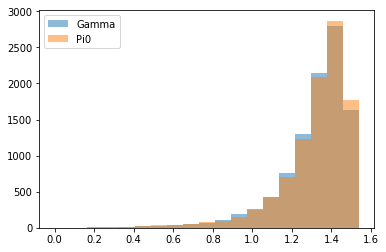

ECAL_nHits


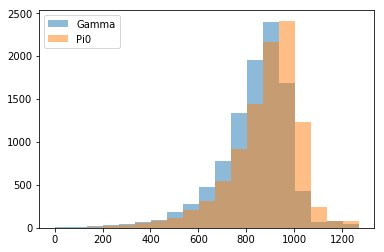

ECAL_ratioFirstLayerToTotalE


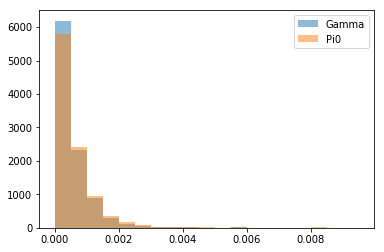

ECALmomentX1


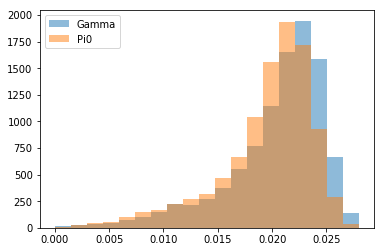

ECALmomentX2


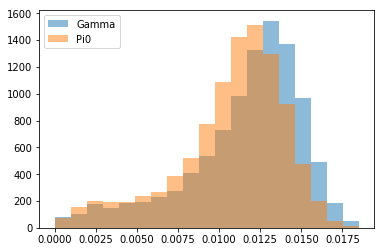

ECALmomentX3


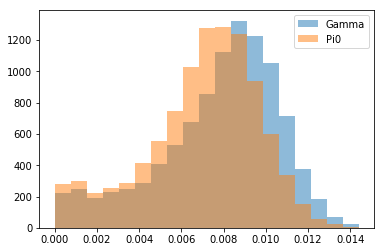

ECALmomentX4


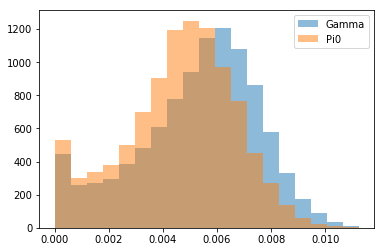

ECALmomentX5


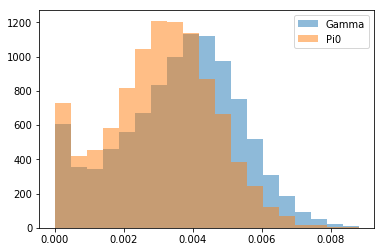

ECALmomentY1


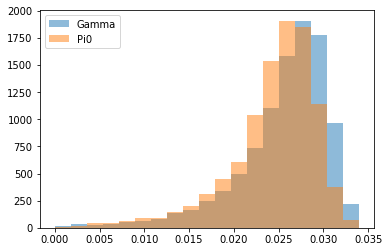

ECALmomentY2


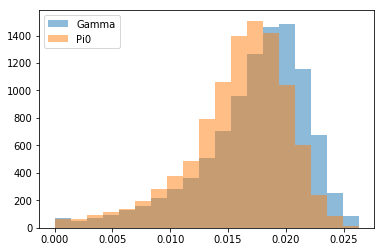

ECALmomentY3


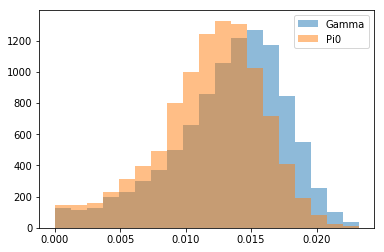

ECALmomentY4


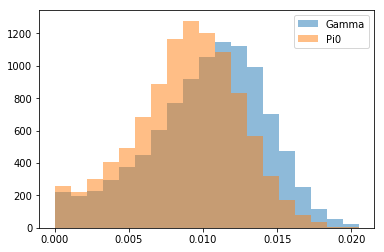

ECALmomentY5


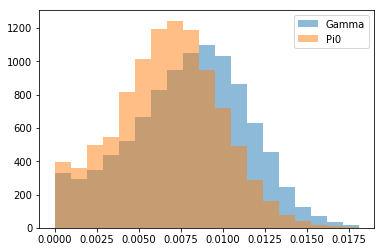

ECALmomentZ1


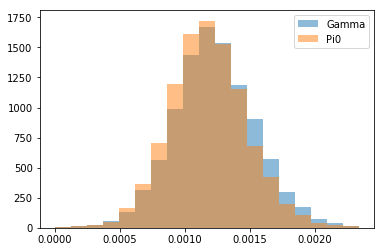

ECALmomentZ2


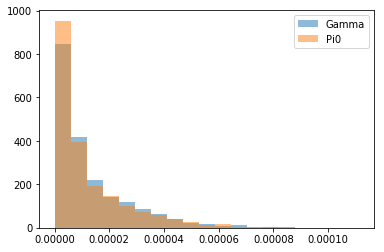

ECALmomentZ3


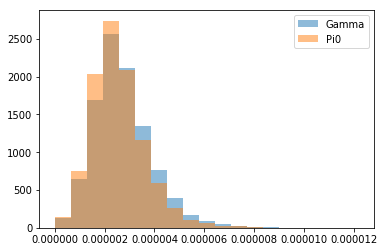

ECALmomentZ4


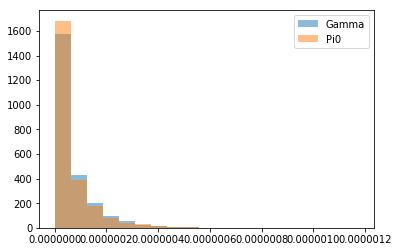

ECALmomentZ5


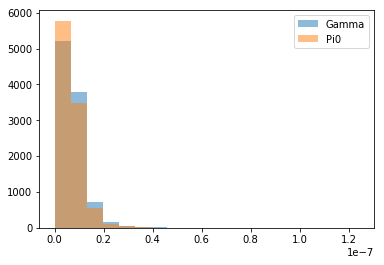

HCAL_E


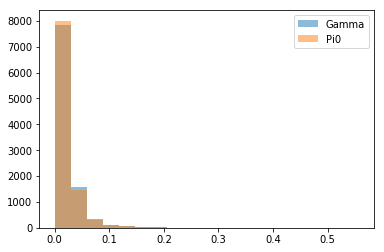

HCAL_ECAL_ERatio


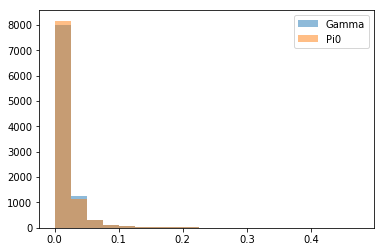

HCAL_ECAL_nHitsRatio


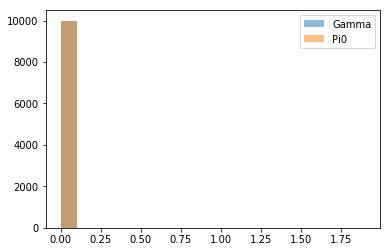

HCAL_nHits


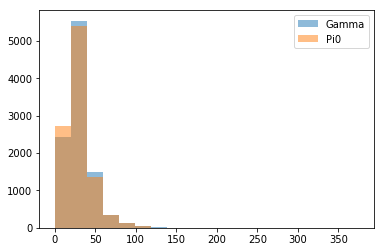

HCAL_ratioFirstLayerToTotalE


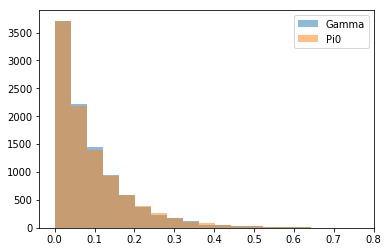

HCALmomentX1


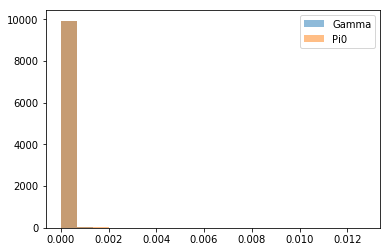

HCALmomentX2


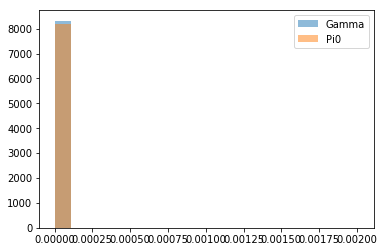

HCALmomentX3


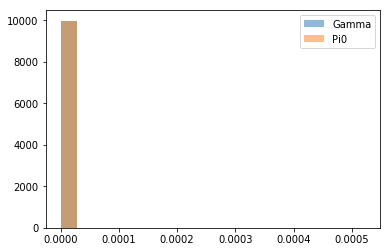

HCALmomentX4


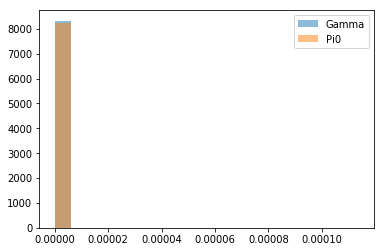

HCALmomentX5


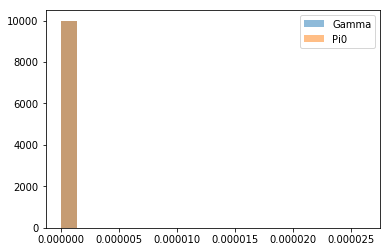

HCALmomentY1


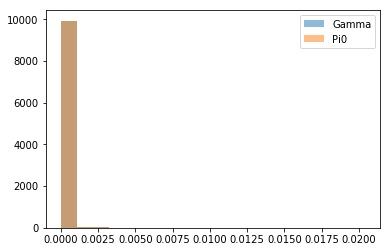

HCALmomentY2


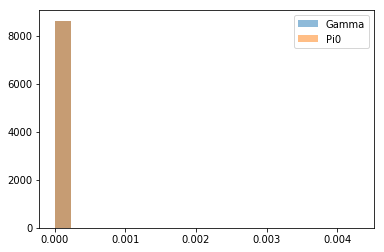

HCALmomentY3


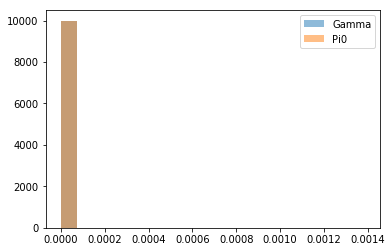

HCALmomentY4


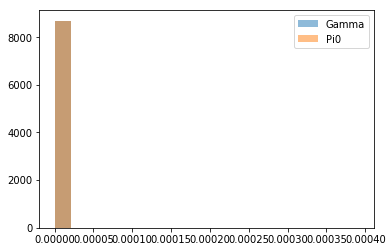

HCALmomentY5


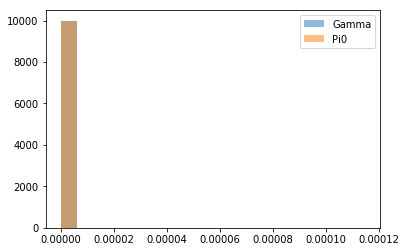

HCALmomentZ1


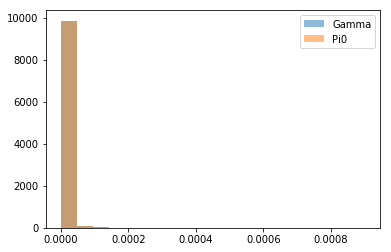

HCALmomentZ2


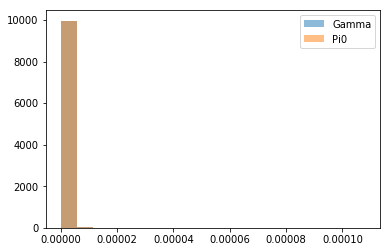

HCALmomentZ3


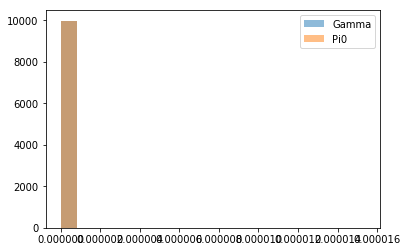

HCALmomentZ4


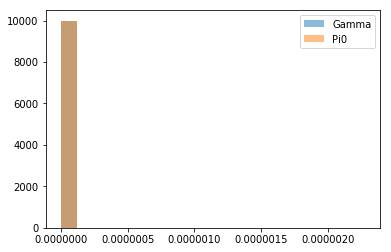

HCALmomentZ5


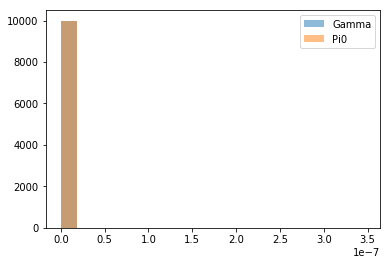

conversion


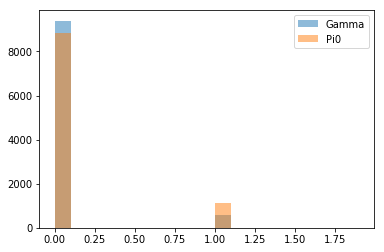

In [7]:
badKeys = ['ECAL', 'HCAL', 'ECAL_ratioFirstLayerToSecondLayerE', 'HCAL_ratioFirstLayerToSecondLayerE',
           'pdgID', 'energy', 'ECALmomentX0', 'ECALmomentY0', 'ECALmomentZ0', 'HCALmomentX0', 'HCALmomentY0',
           'HCALmomentZ0']
rangeMax = {'HCAL_ECAL_ERatio': 0.5, 'ECAL_ratioFirstLayerToTotalE': 0.01, 'HCAL_ECAL_nHitsRatio': 2}
nBins = 20.0

for key in pi0Files[0].keys():
    if key in badKeys: continue
    toPlot = key
    print toPlot
    if toPlot in rangeMax:
        plt.hist(gammaFiles[0][toPlot], alpha=0.5, label="Gamma", bins=np.arange(0, rangeMax[toPlot], rangeMax[toPlot]/nBins))
        plt.hist(pi0Files[0][toPlot], alpha=0.5, label="Pi0", bins=np.arange(0, rangeMax[toPlot], rangeMax[toPlot]/nBins))
    else:
        rangeMaxTemp = max(gammaFiles[0][toPlot])
        plt.hist(gammaFiles[0][toPlot], alpha=0.5, label="Gamma", bins=np.arange(0, rangeMaxTemp, rangeMaxTemp/nBins))
        plt.hist(pi0Files[0][toPlot], alpha=0.5, label="Pi0", bins=np.arange(0, rangeMaxTemp, rangeMaxTemp/nBins))
    plt.legend()
    plt.show()